<center><h2 style="color:#0000ff; font-family:Georgia;"><b>DATA 645. Neural Networks and Deep Learning</b></h2>
<h2 style="color:#ff0000; font-family:'Calibri';">Module 5. Homework Lab</h2>
<h1 style="color:#9933cc; font-family:Arial;"><b>Backpropagation for a Binary Classification Problem<br></b></h1></center>


In this lab assignment, you will implement a simple neural network for a binary classification problem using TensorFlow. Specifically, you will implement the backpropagation algorithm on simulated data for a binary classification problem. Consider a two-dimensional class problem that involves two classes $\omega_1(+1)$ and $\omega_2(-1)$. Each one of them is modeled by a mixture of equiprobable Gaussian distributions. Specifically, the means of the Gaussians associated with $\omega_1$ are $[-5,5]^{\top}$ and $[5,-5]^{\top}$, while the means of the Gaussians associated with $\omega_2$ are $[-5,-5]^{\top}, [0,0]^{\top}$, and $[5,5]^{\top}$. The covariances of all Gaussians are $\sigma^2{\bf I}$, where $\sigma^2 = 1$.

Recall that you may need to install TensorFlow. In Jupyter Notebook, start with "pip install tensorflow".

### Exercise 1: Generate the data 

Generate and plot 2-dimensional data points to be stored in the $X_{\text{train}}$ (training set), comprising 10,000 points from $\omega_1$ and 10,000 points from $\omega_2$. Similarly, generate 2,000 testing points and store them in $X_{\text{test}}$. Ensure that you generate the correct label sets as well.
 
### Exercise 2

Using the training set $X_{\text{train}}$, train a neural network from scratch following a similar approach to the one described in the reading material. Calculate the training and test accuracies using $X_{\text{train}}$ and $X_{\text{test}}$ respectively. Additionally, plot the test points along with the decision lines created by the network. 

### Exercise 3

Run the model three times and observe the variations in the decision lines and the testing accuracy. What factors do you think might be causing these differences?

# Exercise 1: Generate the Data

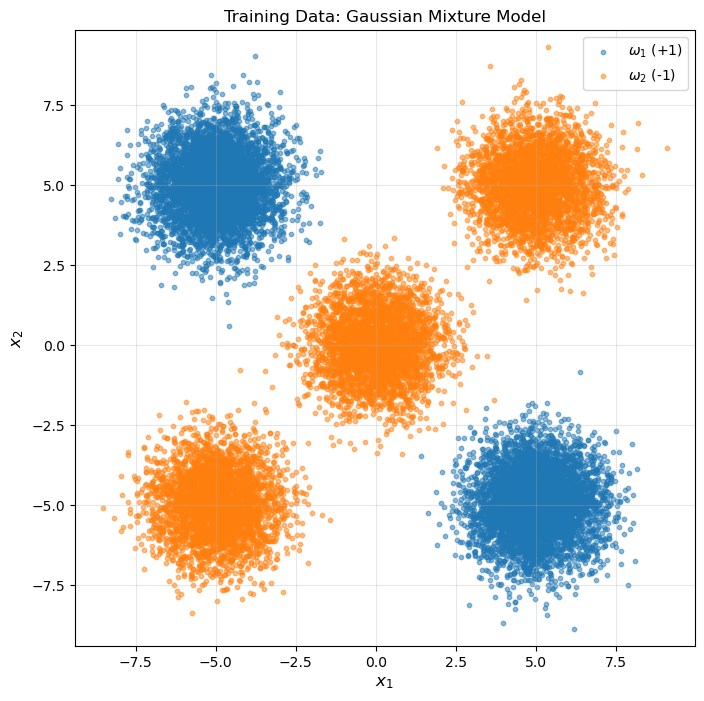

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Set initial variables
rng = np.random.default_rng(42)
sigma = 1.0

# Create a 2x2 covariance matrix. 
# Each gaussian is circular so that the data for each class will be spread 
# equally from the mean and independent from each other (as demanded by the exercise).
cov = sigma**2 * np.eye(2)

# Class Sizes
n_train_per_class = 10000
n_test_per_class = 1000

# Generate training data for w1 
means_w1 = [np.array([-5.0, 5.0]), np.array([5.0, -5.0])]
Xw1_train = np.vstack([rng.multivariate_normal(m, cov, size=n_train_per_class // 2) for m in means_w1])

# Generate training data for w2 
means_w2 = [np.array([-5.0, -5.0]), np.array([0.0, 0.0]), np.array([5.0, 5.0])]
Xw2_train = np.vstack([rng.multivariate_normal(m, cov, size=n_train_per_class // 3) for m in means_w2])

# Combine training data and create labels 
X_train = np.vstack([Xw1_train, Xw2_train])
y_train = np.hstack([np.ones(len(Xw1_train)), -np.ones(len(Xw2_train))])

# Shuffle training data
perm = rng.permutation(len(X_train))
X_train, y_train = X_train[perm], y_train[perm]

# Generate testing data (same mixture proportions)
Xw1_test = np.vstack([rng.multivariate_normal(m, cov, size=n_test_per_class // 2) for m in means_w1])
Xw2_test = np.vstack([rng.multivariate_normal(m, cov, size=n_test_per_class // 3) for m in means_w2])

# Combine test data and create labels
X_test = np.vstack([Xw1_test, Xw2_test])
y_test = np.hstack([np.ones(len(Xw1_test)), -np.ones(len(Xw2_test))])

# Shuffle test data
perm_test = rng.permutation(len(X_test))
X_test, y_test = X_test[perm_test], y_test[perm_test]

# Plot training data
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], alpha=0.5, s=10, label=r'$\omega_1$ (+1)')
plt.scatter(X_train[y_train==-1, 0], X_train[y_train==-1, 1], alpha=0.5, s=10, label=r'$\omega_2$ (-1)')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Training Data: Gaussian Mixture Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Exercise 2: Train a Neural Network and Plot Decision Boundary

In [2]:
print("what's the matter?")

what's the matter?


In [3]:
# Convert labels from {-1, 1} to {0, 1} for binary crossentropy

y_train_bin = ((y_train + 1) / 2).astype(np.float32)
y_test_bin = ((y_test + 1) / 2).astype(np.float32)

# Convert to float32 for TensorFlow
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train_bin, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test_bin, dtype=tf.float32)

In [4]:

import tensorflow as tf
import matplotlib.pyplot as plt

# Build model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_bin, epochs=20, batch_size=128, validation_data=(X_test, y_test_bin))



Epoch 1/20


c:\Users\mcphe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7692 - loss: 0.4197 - val_accuracy: 0.9530 - val_loss: 0.2252
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.1561 - val_accuracy: 0.9805 - val_loss: 0.1071
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0849 - val_accuracy: 0.9905 - val_loss: 0.0625
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9929 - loss: 0.0519 - val_accuracy: 0.9960 - val_loss: 0.0374
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0308 - val_accuracy: 0.9980 - val_loss: 0.0217
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0177 - val_accuracy: 0.9995 - val_loss: 0.0125
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0102 - val_accuracy: 0.9995 - val_loss: 0.0073
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0061 - val_accuracy: 1.0000 - val_

In [5]:
# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train_bin)
test_loss, test_acc = model.evaluate(X_test, y_test_bin)
print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 7.8254e-04
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 9.1189e-04
Training accuracy: 0.9998
Test accuracy: 0.9995


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step


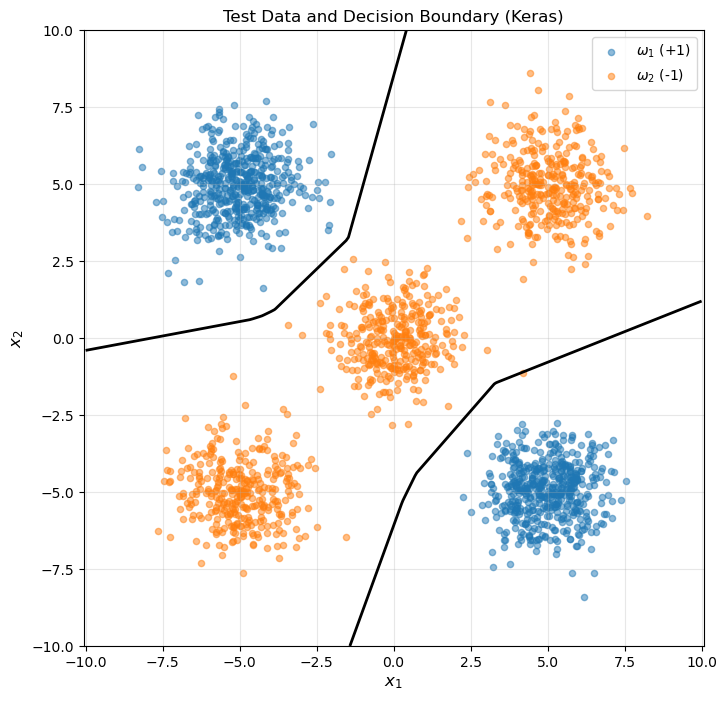

In [6]:
# Plot decision boundary and test points
plt.figure(figsize=(8,8))
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], alpha=0.5, s=20, label=r'$\omega_1$ (+1)')
plt.scatter(X_test[y_test==-1,0], X_test[y_test==-1,1], alpha=0.5, s=20, label=r'$\omega_2$ (-1)')

grid_x, grid_y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_pred = model.predict(grid_points).reshape(grid_x.shape)

plt.contour(grid_x, grid_y, grid_pred, levels=[0.5], colors='k', linewidths=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Test Data and Decision Boundary (Keras)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Exercise 3: Model Variability

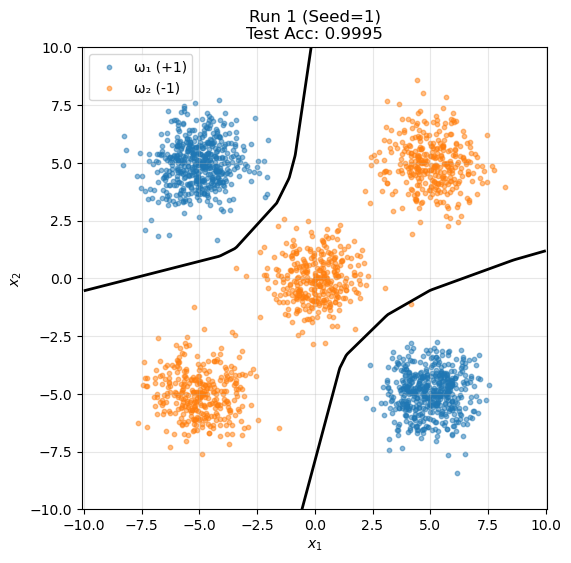

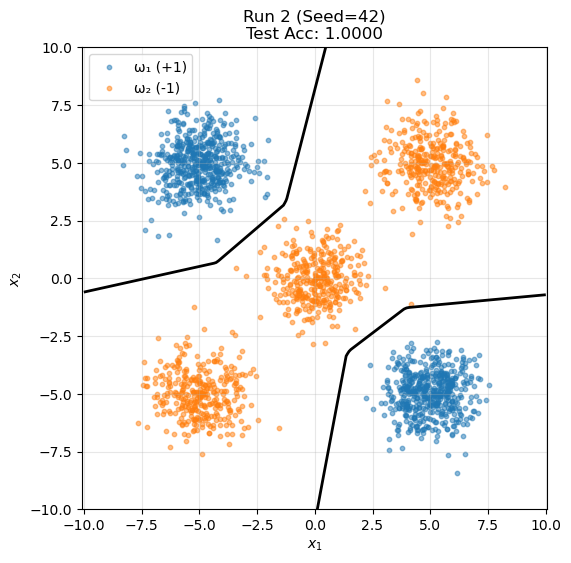

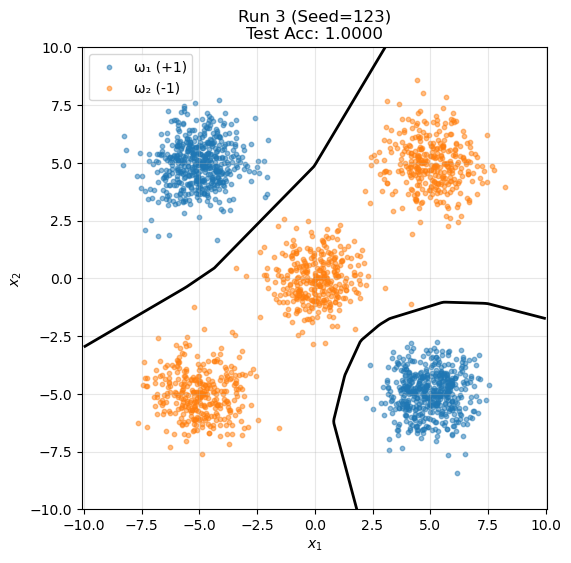

Run 1 (Seed=1): Train Acc = 0.9998, Test Acc = 0.9995
Run 2 (Seed=42): Train Acc = 0.9999, Test Acc = 1.0000
Run 3 (Seed=123): Train Acc = 0.9998, Test Acc = 1.0000


In [ ]:
# --- Exercise 3: Run Keras Model 3 Times with Different Seeds ---

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

results = []
seeds = [1, 42, 123]

for i, seed in enumerate(seeds):
    tf.random.set_seed(seed)
    np.random.seed(seed)

    # Rebuild and compile Keras model for each run
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train_bin, epochs=20, batch_size=128, verbose=0)

    train_loss, train_acc = model.evaluate(X_train, y_train_bin, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test_bin, verbose=0)

    results.append((seed, train_acc, test_acc))

    # Plot decision boundary for each run

    plt.figure(figsize=(6,6))
    plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], alpha=0.5, s=10, label='ω₁ (+1)')
    plt.scatter(X_test[y_test==-1,0], X_test[y_test==-1,1], alpha=0.5, s=10, label='ω₂ (-1)')
    grid_x, grid_y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
    grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
    grid_pred = model.predict(grid_points, verbose=0).reshape(grid_x.shape)
    plt.contour(grid_x, grid_y, grid_pred, levels=[0.5], colors='k', linewidths=2)
    plt.title(f'Run {i+1} (Seed={seed})\nTest Acc: {test_acc:.4f}')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()



for i, (seed, train_acc, test_acc) in enumerate(results):

    print(f"Run {i+1} (Seed={seed}): Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

**Analysis**

The decision boundaries and test accuracies vary between runs using different seeds. There are a few different factors which could affect this. First of all, the initial weights are randomly assigned. This could result in the model finding different local minima, which will change the geometry of the result. Secondly, since we are using a stochastic approach (mini-batch), the training itself has some randomness, with smaller batches of representative samples being chosen at each layer. 